In [2]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Preprocessing

In [3]:
###df = pd.read_csv("F:\\7th SEM\\Youtube Trending Videos Analysis\\Dataset\\IN_youtube_trending_data.csv", parse_dates=['publish_time', 'trending_date'])

df = pd.read_csv("F:\\7th SEM\\Youtube Trending Videos Analysis\\Dataset\\INvideos.csv", parse_dates=['publish_time', 'trending_date'])
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


In [4]:
df.shape

(37352, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                37352 non-null  object             
 1   trending_date           37352 non-null  object             
 2   title                   37352 non-null  object             
 3   channel_title           37352 non-null  object             
 4   category_id             37352 non-null  int64              
 5   publish_time            37352 non-null  datetime64[ns, UTC]
 6   tags                    37352 non-null  object             
 7   views                   37352 non-null  int64              
 8   likes                   37352 non-null  int64              
 9   dislikes                37352 non-null  int64              
 10  comment_count           37352 non-null  int64              
 11  thumbnail_link          37352 non-null  o

In [6]:
df.isna().sum().sum()

561

In [7]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [8]:
df.loc[df.channel_title.isna()] ## channel title --> Juvis Productions (from channel id)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


In [9]:
df.channel_title.fillna('Juvis Productions', inplace=True)

In [10]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [11]:
mask = (df.views<=0)
df = df.loc[~mask]

- **Time Period of data**

In [12]:
## Start time

df.publish_time.min()

Timestamp('2017-05-27 20:27:30+0000', tz='UTC')

In [13]:
## End time 

df.publish_time.max()

Timestamp('2018-06-13 18:05:15+0000', tz='UTC')

## Feature Engineering

In [16]:
df.head(3)

,video_id,title,publishedAt,published_date,published_month,published_day,channelId,channelTitle,categoryId,trendingAt,...,trending_day,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41+00:00,2020-08-12,August,Wednesday,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12 00:00:00+00:00,...,Wednesday,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,2020-08-11,August,Tuesday,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12 00:00:00+00:00,...,Wednesday,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,2020-08-11,August,Tuesday,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12 00:00:00+00:00,...,Wednesday,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...


## Most unique titles in a day on trending page.

In [23]:
date_group = df.groupby('publish_time')['title'].unique().to_frame()
date_group['total_unique'] = date_group.title.transform(lambda x: len(x))
date_group = date_group.sort_values(by='total_unique', ascending=False)

date_group.head(10)

,title,total_unique
publish_time,,
2017-12-30 04:30:01+00:00,[Sharry Mann- Love You (Full Video Song) | Par...,4
2018-03-15 10:30:00+00:00,"[Night Before An Exam | MostlySane, सपना का नय...",3
2018-05-24 12:30:08+00:00,[MANKIRT AULAKH - DARU BAND (Official Song) | ...,3
2018-04-26 12:30:01+00:00,[UNCLE | Mammootty Singing Entha Johnsa Kallil...,3
2017-12-01 04:30:00+00:00,[డిసెంబర్ 3 లోపల ఈ చిన్న పని చేస్తే ధనవంతులు అ...,3
2018-03-08 04:30:00+00:00,[Trump's White House Has No Chaos | The Daily ...,3
2017-12-29 16:30:01+00:00,[Kaashmora 2 (Aayirathil Oruvan) 2017 New Rele...,3
2017-12-08 13:30:00+00:00,[Speedunnodu (2017) New Released Full Hindi Du...,3
2018-04-22 04:30:00+00:00,"[છોકરીયું ની Problem | Pagal Gujju, IPL Extra ...",3


In [24]:
xticks = date_group.index.astype(np.object)[:10].to_list()
xticks = [d.strftime("%Y-%m-%d") for d in xticks]
# xticks

In [25]:
def plot_barplot(x, y, 
                 xticks=None, 
                 yticks=None, 
                 xlabel=None, 
                 ylabel=None, 
                 title=None, 
                 figsize=(15,8),
                 rotation=0,
                 barh=False):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if barh:
        g = plt.barh(y=y, width=x, color='orange', ec='k')
        plt.yticks(ticks=y, labels=yticks)
        
        for rect in g.get_children():
            h = rect.get_height()
            w = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            plt.annotate(f"{w}", (w, y+h/2), ha='left', va='center', fontsize=14)
    else:
        g = plt.bar(x=x, height=y, color='orange', ec='k')
        plt.xticks(ticks=x, labels=xticks, rotation=rotation)

        for rect in g.get_children():
            h = rect.get_height()
            w = rect.get_width()
            x = rect.get_x()
            plt.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=14)

    
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16, color="#E43D40")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    
    

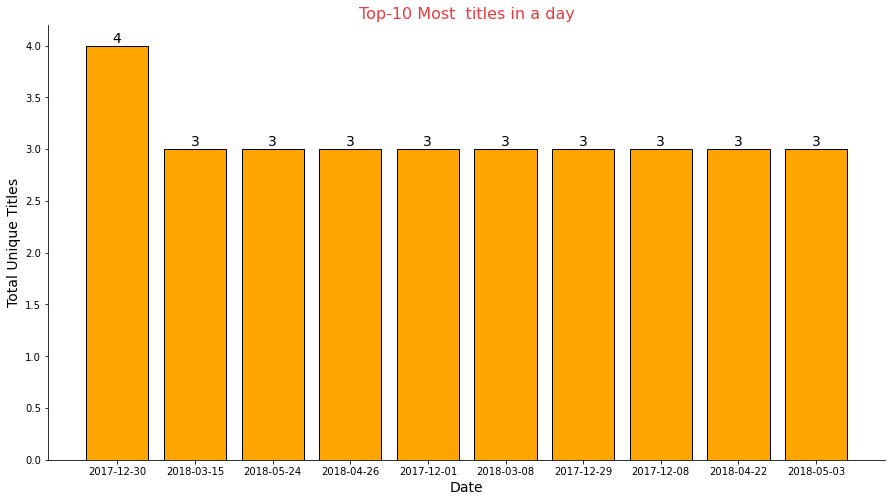

In [57]:
plot_barplot(np.arange(10), date_group.total_unique[:10], xticks=xticks, xlabel="Date", 
             ylabel="Total Unique Titles", 
             title="Top-10 Most titles in a day")

## Top-10 channels On Trending Page

In [29]:
channels_df = (df.groupby(['channel_title'])['channel_title']
               .agg('count')
               .to_frame()
               .rename(columns={'channel_title':'total'}))

channels_df = channels_df.sort_values(by='total', ascending=False)
channels_df.head()

,total
channel_title,
VikatanTV,284
etvteluguindia,282
Flowers Comedy,270
ETV Plus India,253
SAB TV,244


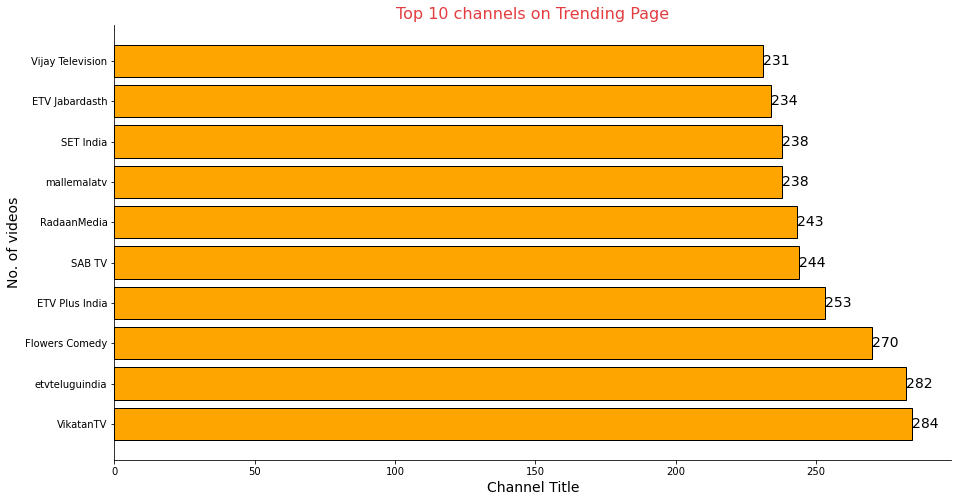

In [30]:
plot_barplot(channels_df.total[:10], channels_df.index[:10], 
             xlabel="Channel Title",
             ylabel="No. of videos", 
             title="Top 10 channels on Trending Page", barh=True)

## Top Video Categories On Trending Page

In [32]:
df.category_id.value_counts(normalize=True)

24    0.447419
25    0.140314
10    0.103288
23    0.091802
22    0.070251
1     0.044389
27    0.032850
26    0.022623
17    0.019571
28    0.014778
43    0.005488
29    0.002811
2     0.001928
20    0.001767
30    0.000428
19    0.000214
15    0.000080
Name: category_id, dtype: float64

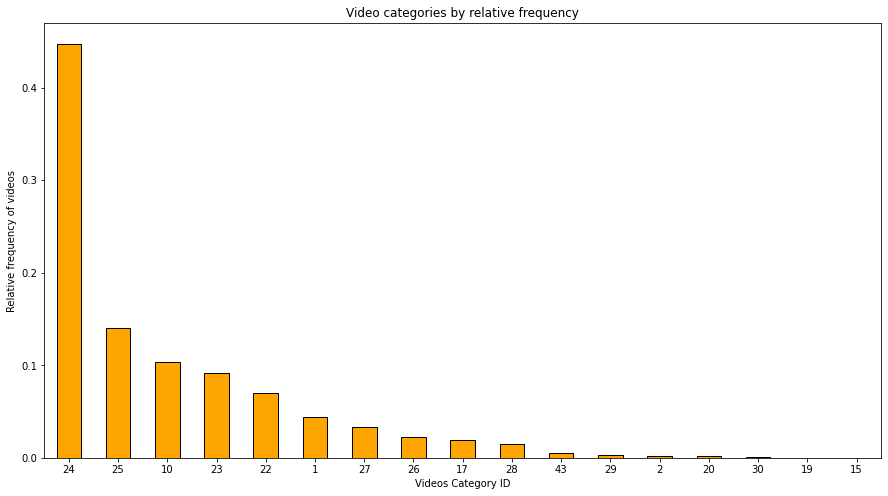

In [34]:
fig = df.category_id.value_counts(normalize=True).plot.bar(figsize=(15, 8), rot=0, color='orange', ec='k')
plt.xlabel("Videos Category ID")
plt.ylabel("Relative frequency of videos")
plt.title("Video categories by relative frequency")
plt.show()



## No. of videos on same day Trending Page

In [35]:
#group titles by their published date and minimum trending date

time_df = df.groupby("title")[['published_time', 'trending_date']].agg('min')

## add time column by differencing trending datetime and published datetime
time_df['time'] = time_df['trending_date'] - time_df['published_time']

# convert time to seconds
time_df.time = time_df.time.dt.days

# sort df by time column
time_df = time_df.sort_values(by='time')

time_df.head()

KeyError: "Columns not found: 'published_time', 'trending_date'"

In [26]:
same_day_df = time_df[time_df.time==0]

print("Total videos on same day trending page are", len(same_day_df))

Total videos on same day trending page are 3367


## Channel and Category with the most trending videos on the same day

In [37]:


# Unique titles in each channel
full_sd_df = full_sd_df.groupby('channel_title')['title'].unique().to_frame()

# add column with total number to unique titles on same day
full_sd_df['counts_unique'] = full_sd_df.title.transform(lambda x: len(x))

# sort dataframe by 'count_unique'
full_sd_df = full_sd_df.sort_values(by='counts_unique', ascending=False)

full_sd_df.head()

NameError: name 'full_sd_df' is not defined

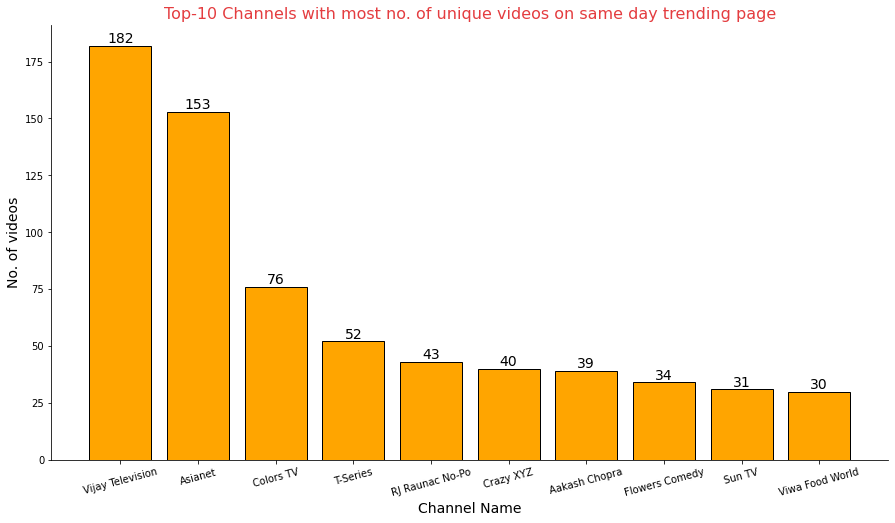

In [28]:
plot_barplot(x=np.arange(10), y=full_sd_df.counts_unique[:10], 
             xticks=full_sd_df.index[:10],
             xlabel="Channel Name", ylabel="No. of videos", 
             title="Top-10 Channels with most no. of unique videos on same day trending page",
             figsize=(15,8), rotation=15)

In [29]:
full_sd_df = df.loc[df.title.isin(same_day_df.index.to_list())]

full_sd_df = full_sd_df.groupby('categoryId')['title'].unique().to_frame()
full_sd_df['counts_unique'] = full_sd_df.title.transform(lambda x: len(x))

full_sd_df = full_sd_df.sort_values(by='counts_unique', ascending=False)

full_sd_df.head()

,title,counts_unique
categoryId,,
24,[Sadak 2 | Official Trailer | Sanjay | Pooja |...,1393
10,[Jatti Jaandi (Official Video) | Kambi Ft. Mah...,797
22,[We got LOST in CLOUDS | LONAVALA vlog series...,266
17,"[IPL 2020: It is back!, 12 Years of Virat: Rel...",144
25,"[7 AM | ETV Telugu News | 12th Aug 2020, குப்ப...",139


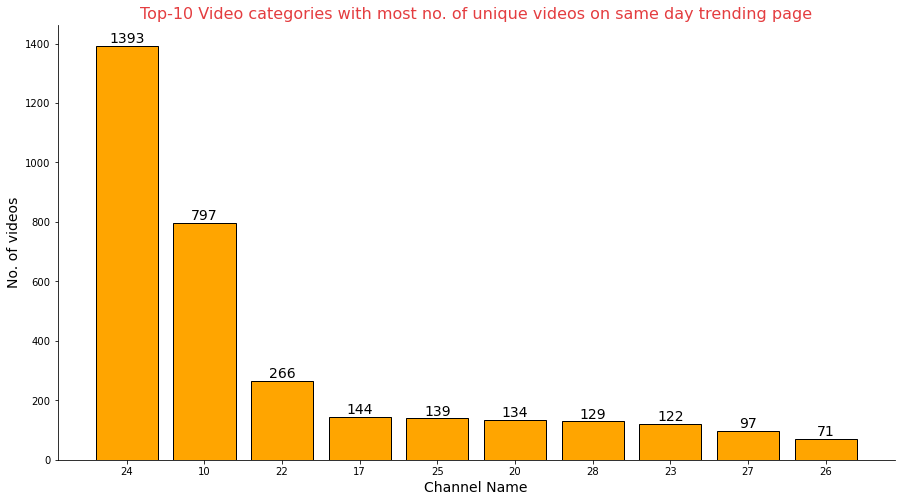

In [30]:
plot_barplot(x=np.arange(10), 
             y=full_sd_df.counts_unique[:10], 
             xticks=full_sd_df.index[:10],
             xlabel="Channel Name", 
             ylabel="No. of videos", 
             title="Top-10 Video categories with most no. of unique videos on same day trending page",
             figsize=(15,8))

## Videos that stayed for max number of days on Trending Page

In [39]:
## LOGIC: A video can be on trending page from its' start on trending page to alternate day or regular day, or skipping many days.
## So, we cannot just calucalte the difference of first trending day and last trending day
## we need to calculate each day, the video was actually on trending

days_df = df.groupby('title')['trendingAt'].unique().to_frame()

days_df['days'] = days_df.trendingAt.transform(lambda x: len(x))

days_df = days_df.sort_values(by='days', ascending=False)

days_df.head()

,trendingAt,days
title,,
Nandhini | Today @ 9 pm | Sun TV,"[17.05.12, 17.06.12, 17.07.12, 17.08.12, 17.12...",15
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet,"[18.23.04, 18.29.04, 18.30.04, 18.06.05, 18.07...",12
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures,"[18.06.02, 18.07.02, 18.08.02, 18.09.02, 18.10...",12
BB Ki Vines- | Maun Vrat |,"[18.06.03, 18.07.03, 18.08.03, 18.09.03, 18.10...",9
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani,"[18.25.04, 18.26.04, 18.27.04, 18.28.04, 18.29...",9


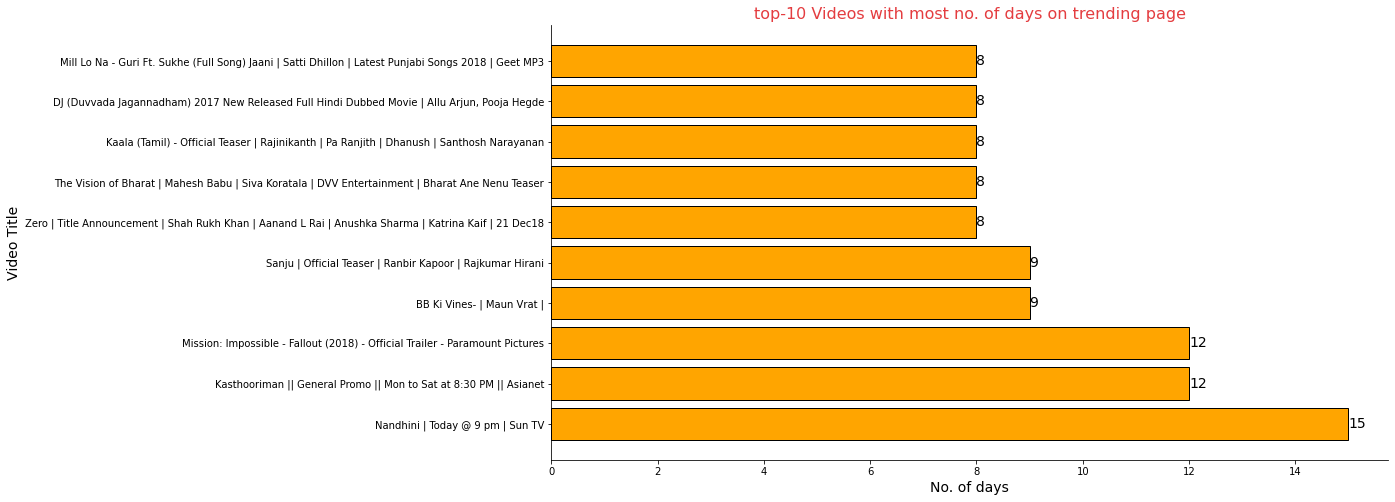

<Figure size 432x288 with 0 Axes>

In [40]:
plot_barplot(x=days_df.days[:10], 
             y=np.arange(10), 
             yticks=days_df.index[:10],
             ylabel="Video Title", 
             xlabel="No. of days", 
             title="top-10 Videos with most no. of days on trending page",
             figsize=(15,8), barh=True)
plt.savefig('figname_1.png', facecolor = 'white', transparent=True)

## Most Viewed, liked and Disliked Videos on Trending Page

In [41]:
sub_df = df.groupby('title')[['views', 'likes', 'dislikes','comment_count']].max()
sub_df.head()

,views,likes,dislikes,comment_count
title,,,,
KAJAL RAGHWANI SUPERHIT MOVIE ( Full HD 2018 ) Bhojpuri Superhit Full Movie 2018,526046,668,313,79
जंगली शेर 2018 भोजपुरी की सबसे बड़ी फिल्म PAWAN SINGH (HD 2018) BHOJPUR SUPERHIT FILM 2018,1998460,3765,1951,546
जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( Full HD 2018 ) Bhojpuri Full Movie 2018,1292467,2154,1176,295
निरहुआ पैसेवाला NIRAHUA FULL MOVIE ( NEW 2018 HD ) Superhit Bhojpuri Full Film 2018,868173,1453,622,206
सिरफिरा आशिक़ CHINTU PANDEY SUPERHIT MOVIE ( HD 2018 ) Bhojpuri Full HD Film 2018,939766,1827,830,246


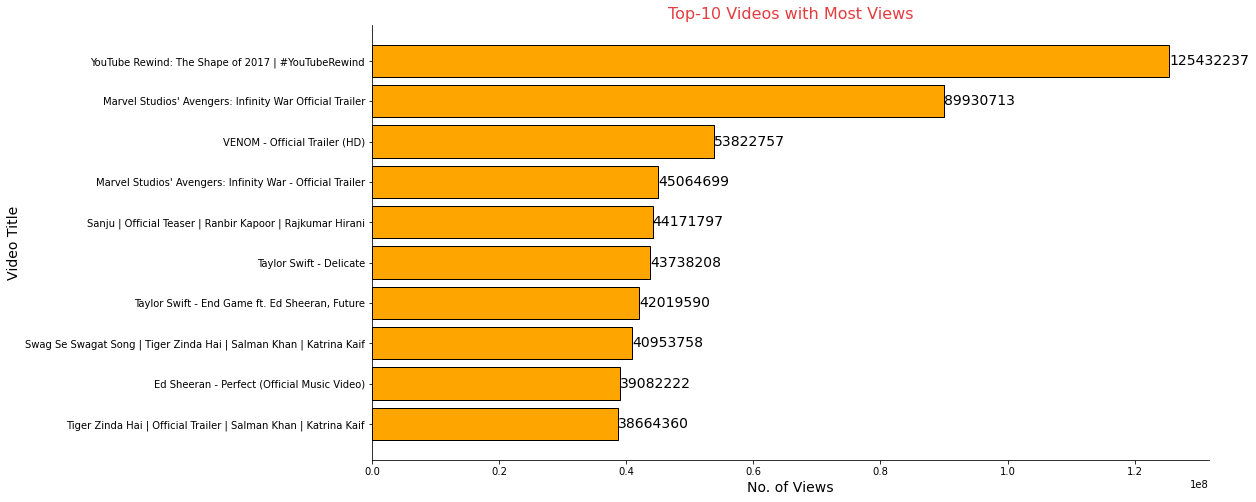

In [43]:
g = sub_df.views.sort_values(ascending=False)[:10].sort_values()

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of Views", 
             title="Top-10 Videos with Most Views",
             figsize=(15,8), barh=True)

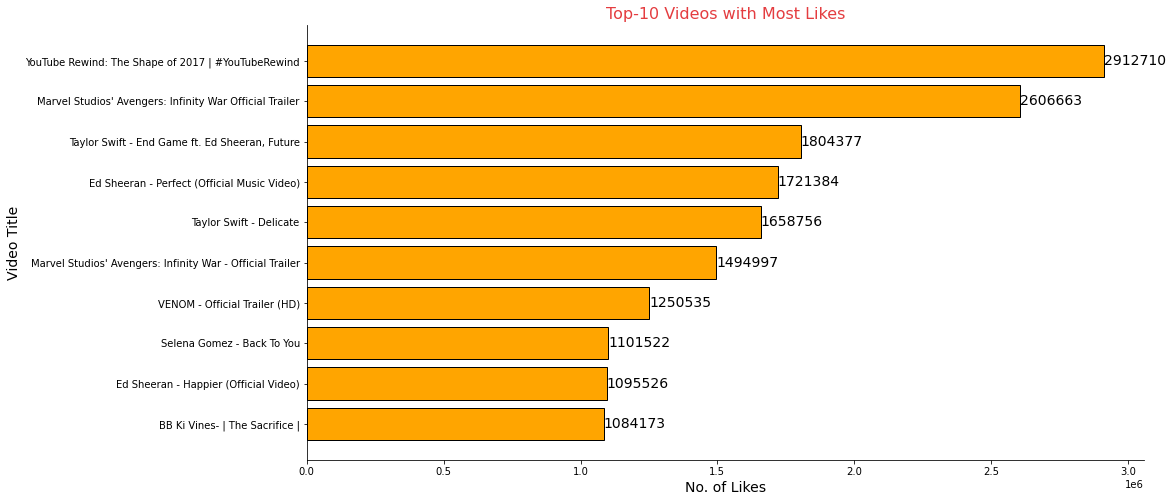

In [44]:
g = sub_df.likes.sort_values(ascending=False)[:10].sort_values()

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of Likes", 
             title="Top-10 Videos with Most Likes",
             figsize=(15,8), barh=True)

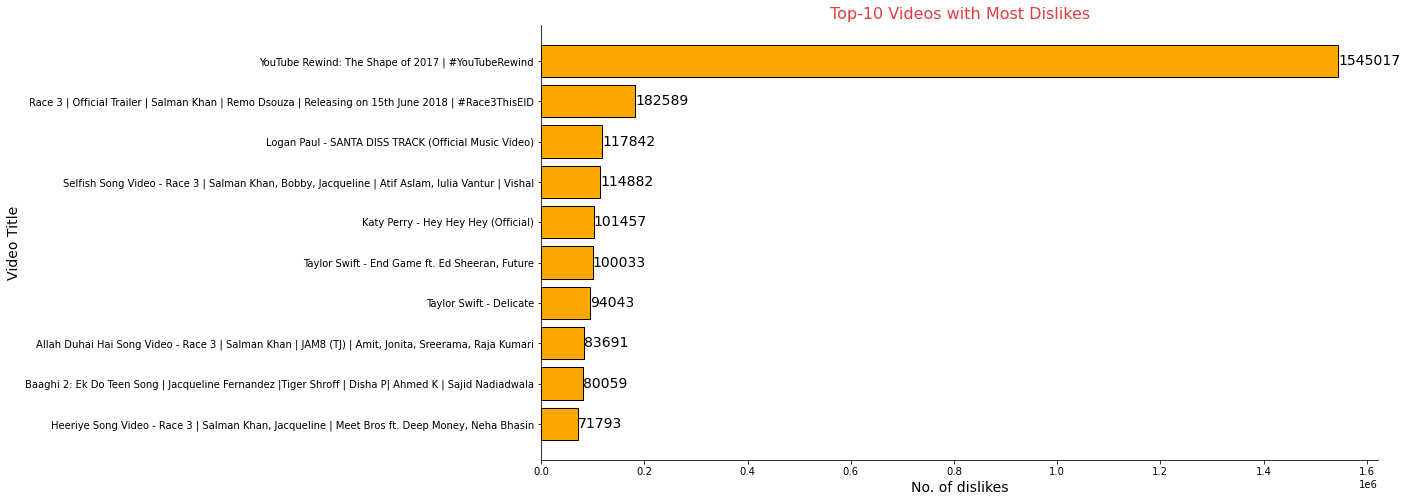

In [45]:
g = sub_df.dislikes.sort_values(ascending=False)[:10].sort_values()

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of dislikes", 
             title="Top-10 Videos with Most Dislikes",
             figsize=(15,8), barh=True)

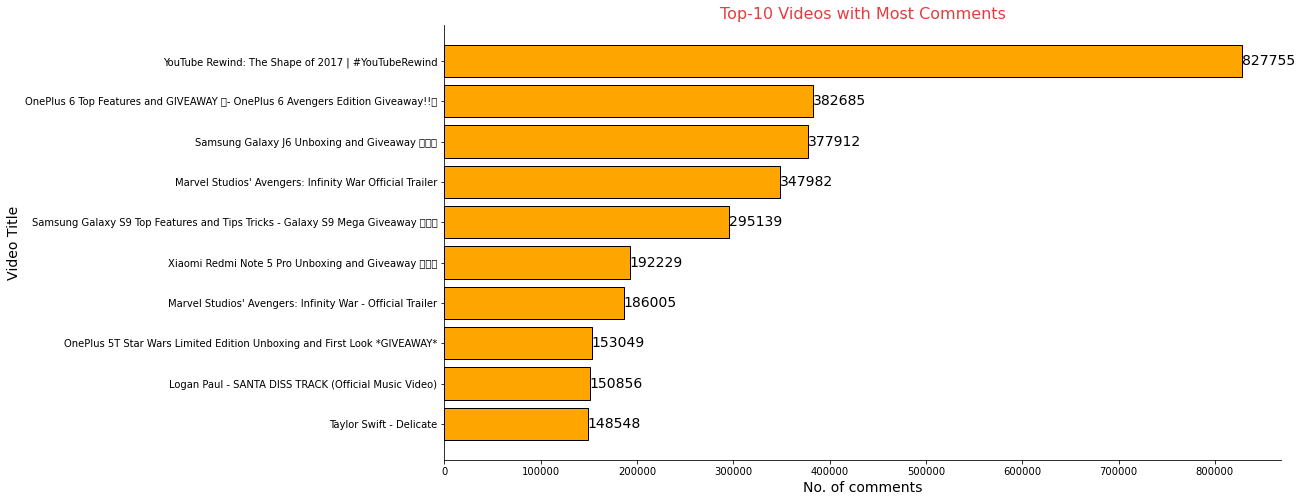

In [46]:
g = sub_df.comment_count.sort_values(ascending=False)[:10].sort_values()

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of comments", 
             title="Top-10 Videos with Most Comments",
             figsize=(15,8), barh=True)

## Min Viewed, liked and Disliked Videos on Trending Page

In [47]:
min_df = df.groupby('title')[['views', 'likes', 'dislikes','comment_count']].min()
min_df.head()

,views,likes,dislikes,comment_count
title,,,,
KAJAL RAGHWANI SUPERHIT MOVIE ( Full HD 2018 ) Bhojpuri Superhit Full Movie 2018,443397,595,276,68
जंगली शेर 2018 भोजपुरी की सबसे बड़ी फिल्म PAWAN SINGH (HD 2018) BHOJPUR SUPERHIT FILM 2018,1221130,2522,1227,350
जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( Full HD 2018 ) Bhojpuri Full Movie 2018,702456,1357,653,175
निरहुआ पैसेवाला NIRAHUA FULL MOVIE ( NEW 2018 HD ) Superhit Bhojpuri Full Film 2018,556256,1063,396,139
सिरफिरा आशिक़ CHINTU PANDEY SUPERHIT MOVIE ( HD 2018 ) Bhojpuri Full HD Film 2018,409341,983,365,125


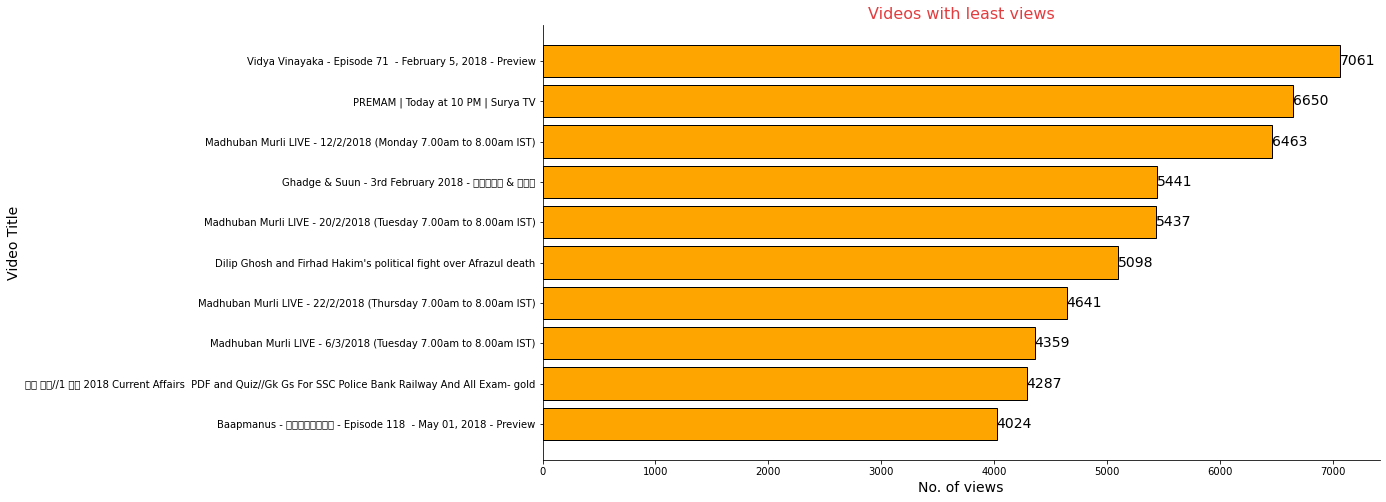

In [48]:
g = min_df.views.sort_values()[:10]

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of views", 
             title="Videos with least views",
             figsize=(15,8), barh=True)

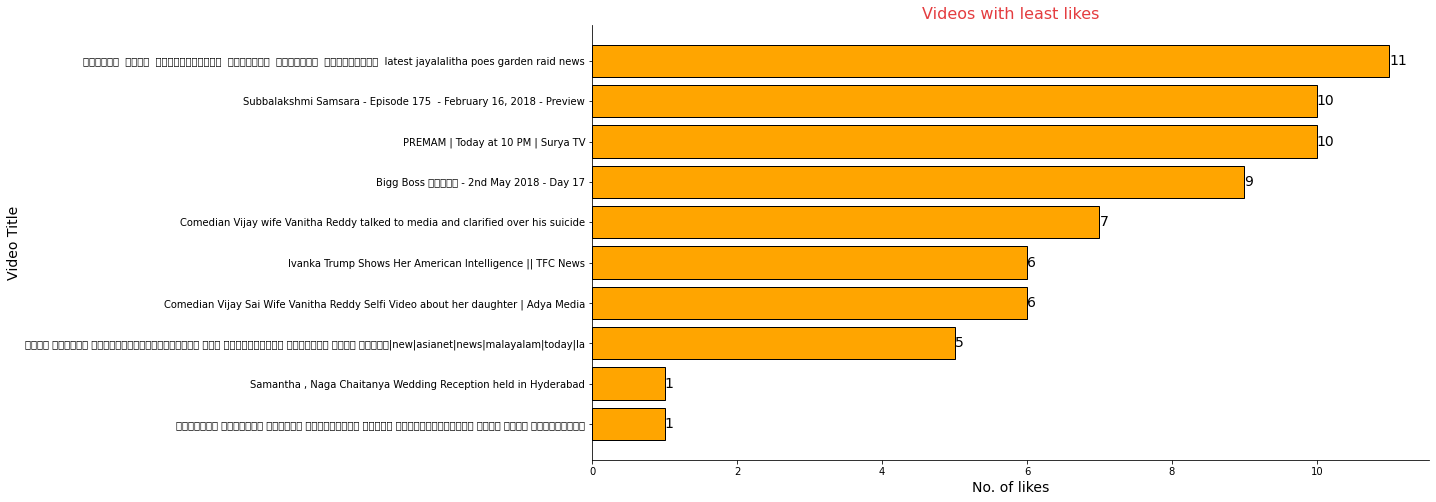

In [49]:
g = min_df.likes[min_df.likes>0].sort_values()[:10]

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of likes", 
             title="Videos with least likes",
             figsize=(15,8), barh=True)

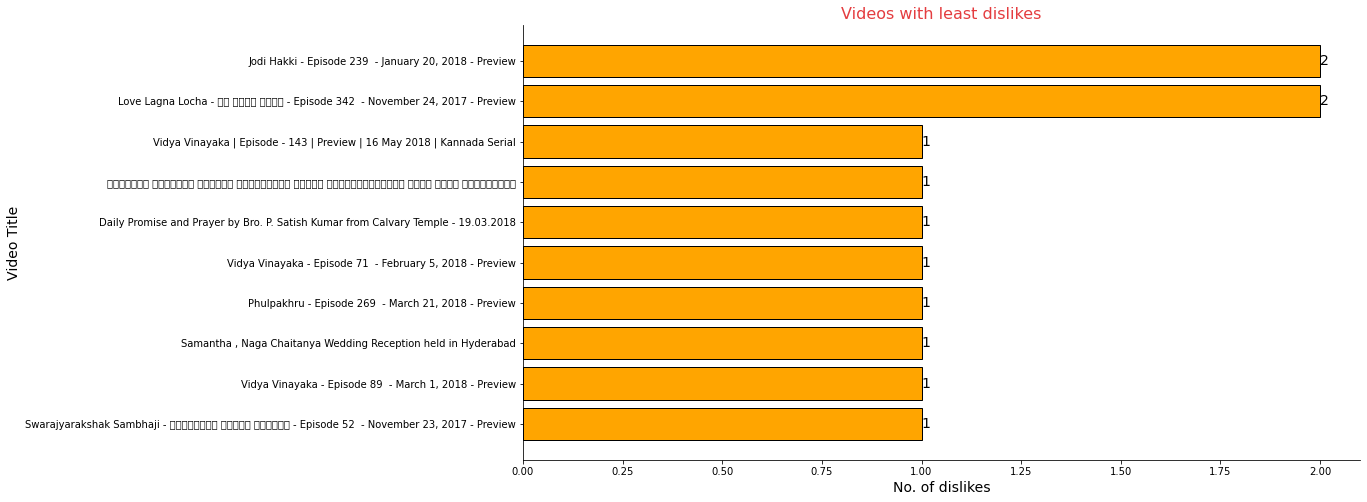

In [50]:
g = min_df.dislikes[min_df.dislikes>0].sort_values()[:10]

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of dislikes", 
             title="Videos with least dislikes",
             figsize=(15,8), barh=True)

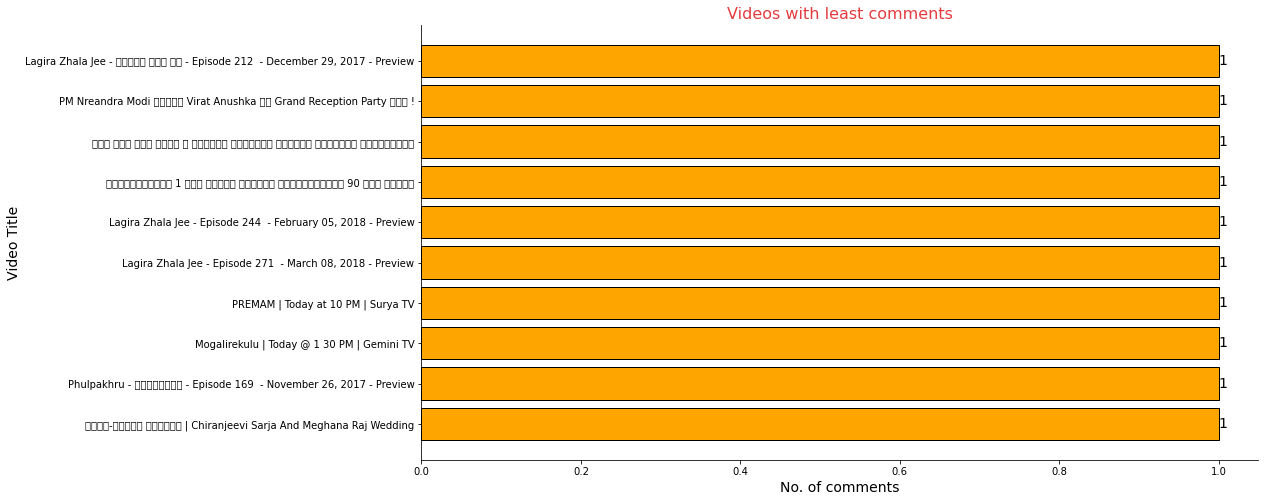

In [51]:
g = min_df.comment_count[min_df.comment_count>0].sort_values()[:10]

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of comments", 
             title="Videos with least comments",
             figsize=(15,8), barh=True)

## Likes, Dislikes, and Commensts per 1000 views

In [52]:
sub_df['likes_per_1k_views'] = sub_df.likes.divide(sub_df.views) * 1000
sub_df['dislikes_per_1k_views'] = sub_df.dislikes.divide(sub_df.views) * 1000
sub_df['comments_per_1k_views'] = sub_df.comment_count.divide(sub_df.views) * 1000

sub_df.head()

,views,likes,dislikes,comment_count,likes_per_1k_views,dislikes_per_1k_views,comments_per_1k_views
title,,,,,,,
KAJAL RAGHWANI SUPERHIT MOVIE ( Full HD 2018 ) Bhojpuri Superhit Full Movie 2018,526046,668,313,79,1.269851,0.595005,0.150177
जंगली शेर 2018 भोजपुरी की सबसे बड़ी फिल्म PAWAN SINGH (HD 2018) BHOJPUR SUPERHIT FILM 2018,1998460,3765,1951,546,1.883951,0.976252,0.273210
जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( Full HD 2018 ) Bhojpuri Full Movie 2018,1292467,2154,1176,295,1.666580,0.909888,0.228246
निरहुआ पैसेवाला NIRAHUA FULL MOVIE ( NEW 2018 HD ) Superhit Bhojpuri Full Film 2018,868173,1453,622,206,1.673630,0.716447,0.237280
सिरफिरा आशिक़ CHINTU PANDEY SUPERHIT MOVIE ( HD 2018 ) Bhojpuri Full HD Film 2018,939766,1827,830,246,1.944101,0.883199,0.261767


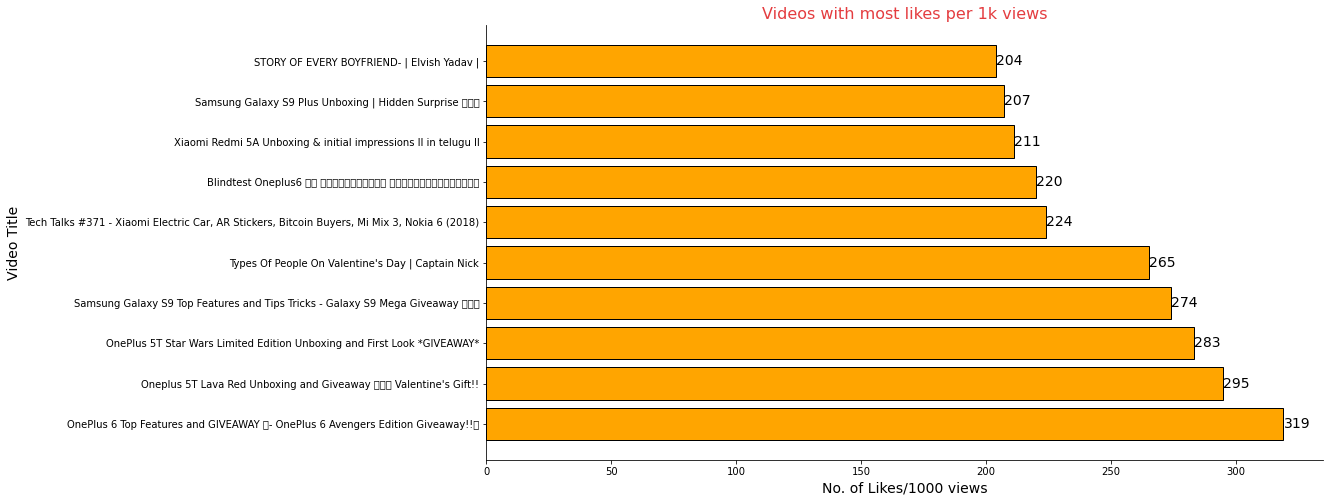

In [53]:
g = sub_df.likes_per_1k_views.sort_values(ascending=False)[:10]

plot_barplot(x=g.astype('int'), 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of Likes/1000 views", 
             title="Videos with most likes per 1k views",
             figsize=(15,8), barh=True)

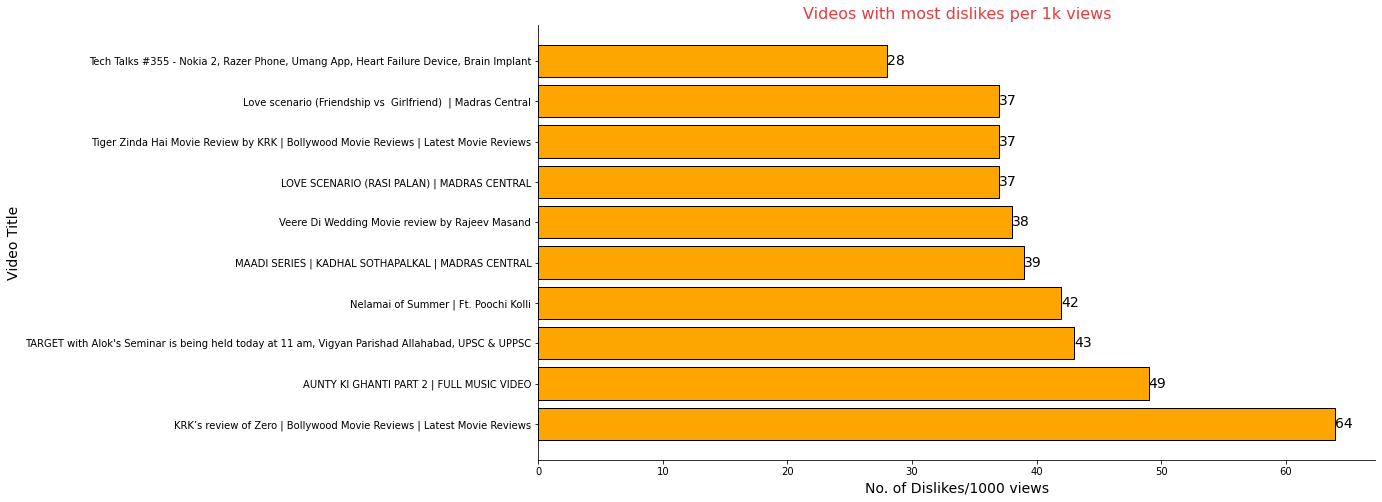

In [54]:
g = sub_df.dislikes_per_1k_views.sort_values(ascending=False)[:10]

plot_barplot(x=g.astype('int'), 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of Dislikes/1000 views", 
             title="Videos with most dislikes per 1k views",
             figsize=(15,8), barh=True)

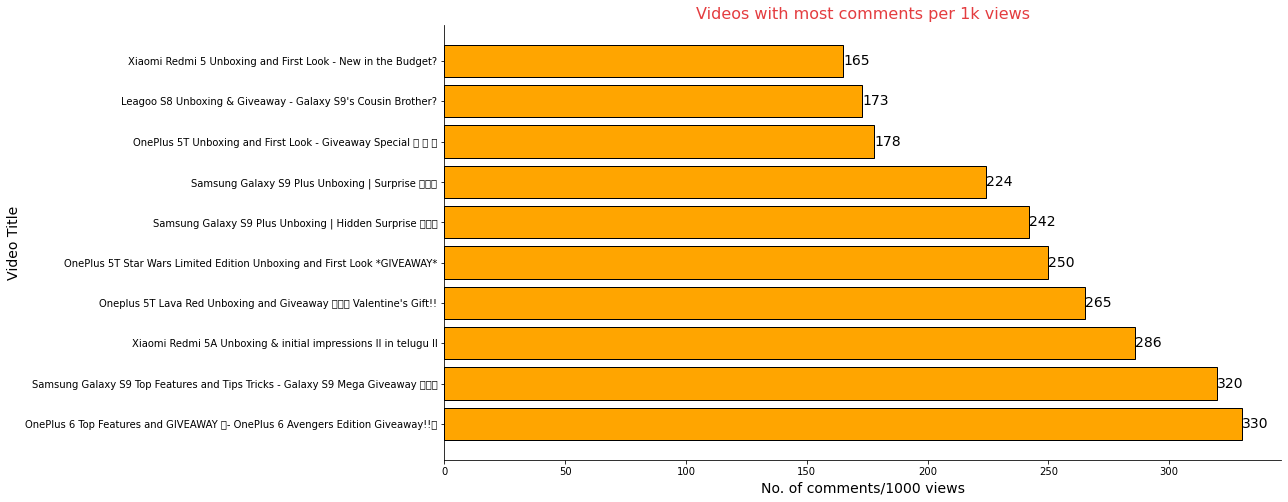

In [55]:
g = sub_df.comments_per_1k_views.sort_values(ascending=False)[:10]

plot_barplot(x=g.astype('int'), 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of comments/1000 views", 
             title="Videos with most comments per 1k views",
             figsize=(15,8), barh=True)

In [56]:
comment_df = df.groupby('comments_disabled')['title'].unique().to_frame()
comment_df['total'] = comment_df.title.transform(lambda x: len(x))
comment_df['percentage'] = comment_df.total / comment_df.total.sum()*100
comment_df

,title,total,percentage
comments_disabled,,,
False,[Sharry Mann: Cute Munda ( Song Teaser) | Parm...,16126,96.314878
True,"[पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर द...",617,3.685122


- **Less than 1% videos on trending page have their comments disabled**

In [50]:
rating_df = df.groupby('ratings_disabled')['title'].unique().to_frame()
rating_df['total'] = rating_df.title.transform(lambda x: len(x))
rating_df['percentage'] = rating_df.total / rating_df.total.sum()*100
rating_df

,title,total,percentage
ratings_disabled,,,
False,[Sadak 2 | Official Trailer | Sanjay | Pooja |...,17715,99.204794
True,[Face To Face With Sarileru Neekevvaru Fight S...,142,0.795206


- **Less than 1% videos on trending page have their ratings disabled**